In [1]:
import pandas as pd 
import numpy as np 

# Untuk visualisasi
import matplotlib.pyplot as plt

# Kita pakai SVD untuk Collaborative Filltering
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate as evaluate

# Pakai TfIdfVectorizer dari scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

reader = Reader()

# Baca Data CSV nya untuk Content Based
df1=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/tmdb_5000_credits.csv')
df2=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/tmdb_5000_movies.csv')

# Baca Data CSV nya untuk Collaborative Filltering
ratings=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/ratings.csv')

In [2]:
# Persiapan data Content Based
df2= df2.merge(df1,left_on='id', right_on='movie_id')

In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
# Rating.csv x Movie x credit

# Silangkan diantara Data Content Base dan Collaborative
df3= ratings.merge(df2,left_on='movieId', right_on='movie_id')

In [5]:
# Lihat jumlah user yang redundan, karena user bisa memberikan rating lebih dari 1 kali
listUserDF=df3.groupby('userId').size().reset_index(name='counts')
listUserDF.shape

(247466, 2)

In [6]:
# Terlihat userId 1 memberikan 2 kali penilaian
listUserDF.head()

,userId,counts
0,1,2
1,2,11
2,3,3
3,4,9
4,5,3


In [7]:
# Pecah list User dan list Count User yang telah di Groupying

listUser = listUserDF['userId'].values.tolist() 
listCountUser = listUserDF['counts'].values.tolist()

In [8]:
# pip install matplotlib
# pip install pil

# Tidak dijalankan karena terlalu berat
# plt.style.use('_mpl-gallery')

# x = listUser
# y = listCountUser

# # plot
# fig, ax = plt.subplots(figsize=(50,20))

# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# ax.set( xticks=np.arange(1, max(x)),
#         yticks=np.arange(1, max(y)))

# plt.show()

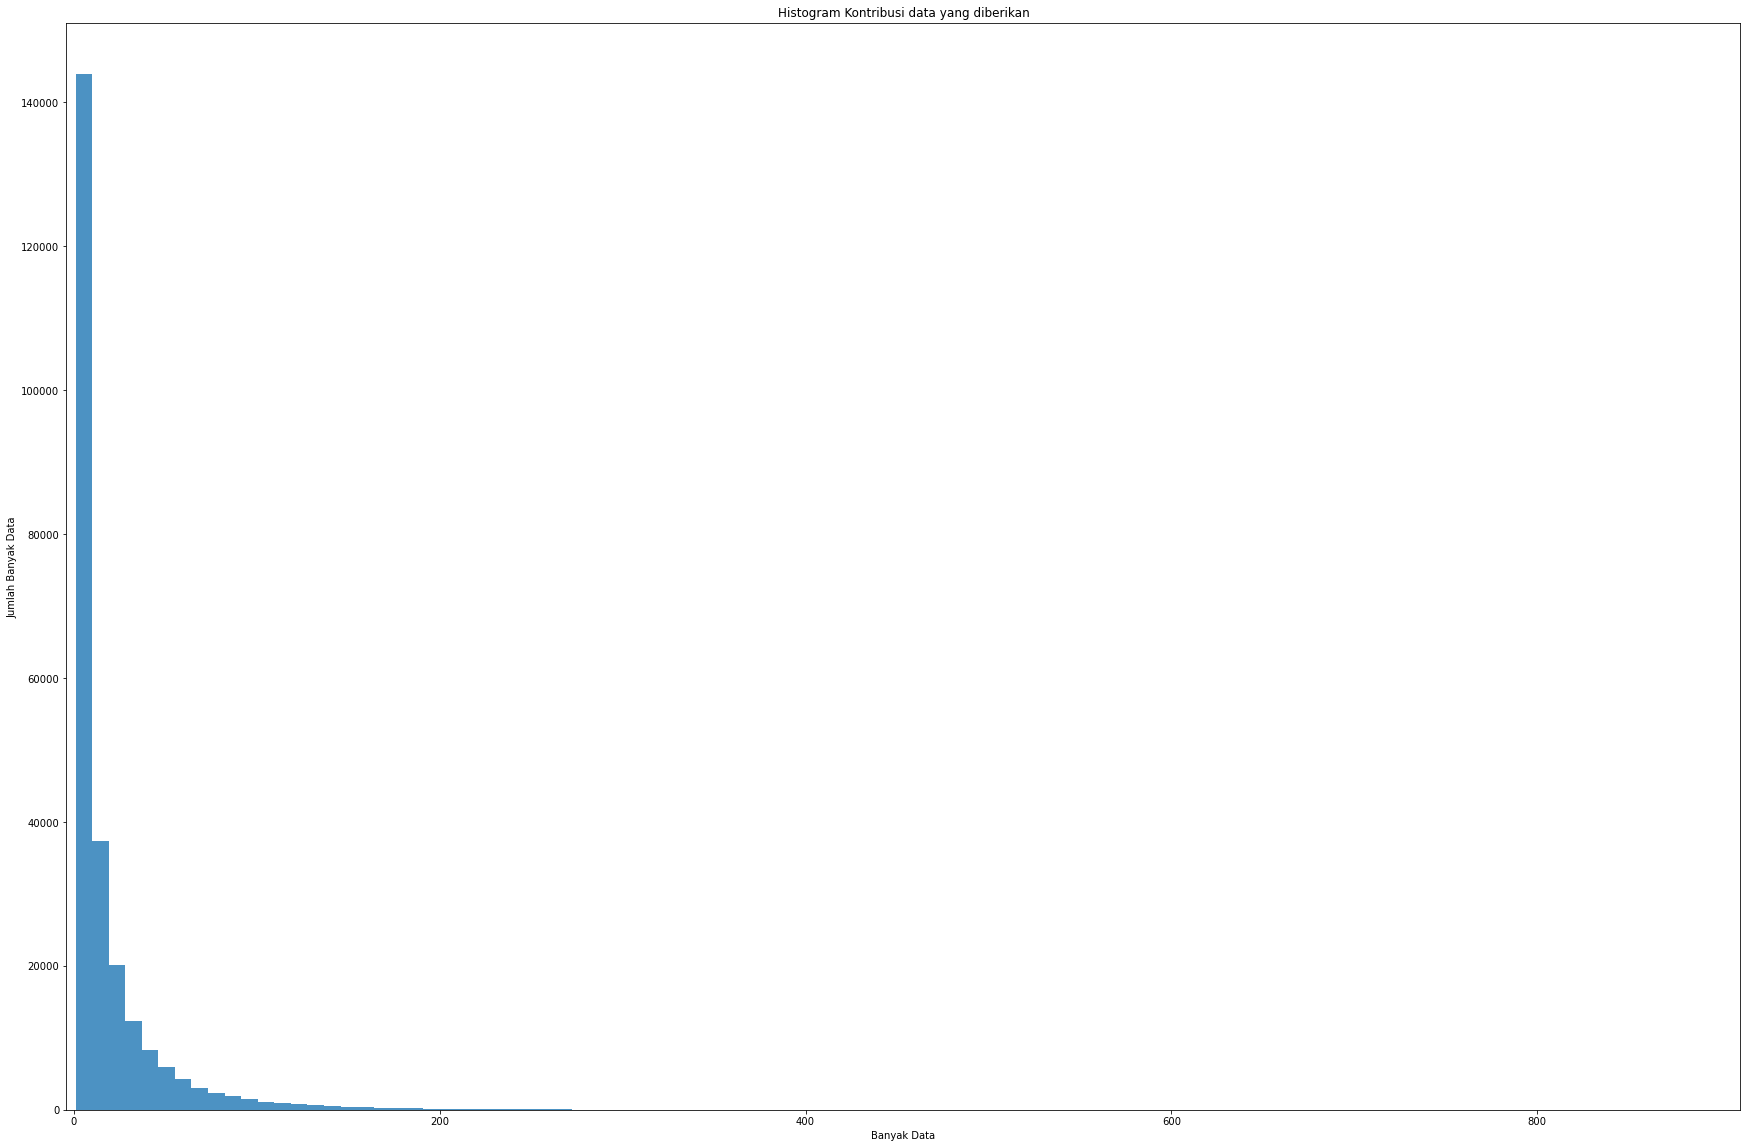

In [9]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=100, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [10]:
# Modul membantu proses statistik
import statistics

# Meannya 18.81
print(sum(listCountUser) / len(listCountUser))

# Standar Deviasi nya 30.65
print(statistics.stdev(listCountUser))

# Dari grafik hystogram dan Standart Deviasi diketahui persebaran data bernilai 30 dengan mean 18.81
# Artinya lokasi data terbanyak ada disekitar area tersebut (18.81)
# Pada proses ini dipilih range nilai 25-100 untuk dijadikan data latih
# Jika data record rating ke movie yang dilatihkan hanya berjumlah 5-20 per user, maka terlalu sedikit
# Oleh karena itu, dengan bantuan Hystogram dipilih 25-100 untuk jadi data latih karena cukup banyak jumlah datanya
# dan dirasa konstribusi data tersebut paling banyak dan dinilai cukup balance

18.811800408945068
30.65274266586585


In [11]:
# dapatin data lengkap dari 184 user yang sudah diseleksi dari sebelumnya 670
listUserDF=listUserDF.loc[(listUserDF['counts']>25) & (listUserDF['counts']<100)]
listUserDF.shape

(44858, 2)

In [12]:
listUserDF.head()

,userId,counts
11,12,52
14,15,26
31,34,41
34,37,27
39,43,46


In [13]:
listUser = listUserDF['userId'].values.tolist()
listCountUser = listUserDF['counts'].values.tolist()

In [14]:
#  Tidak dijalankan karena terlalu berat
# plt.style.use('_mpl-gallery')

# x = listUser
# y = listCountUser

# # plot
# fig, ax = plt.subplots(figsize=(30,20))

# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)),
#        ylim=(0, 8), yticks=np.arange(1, max(y)))

# plt.show()

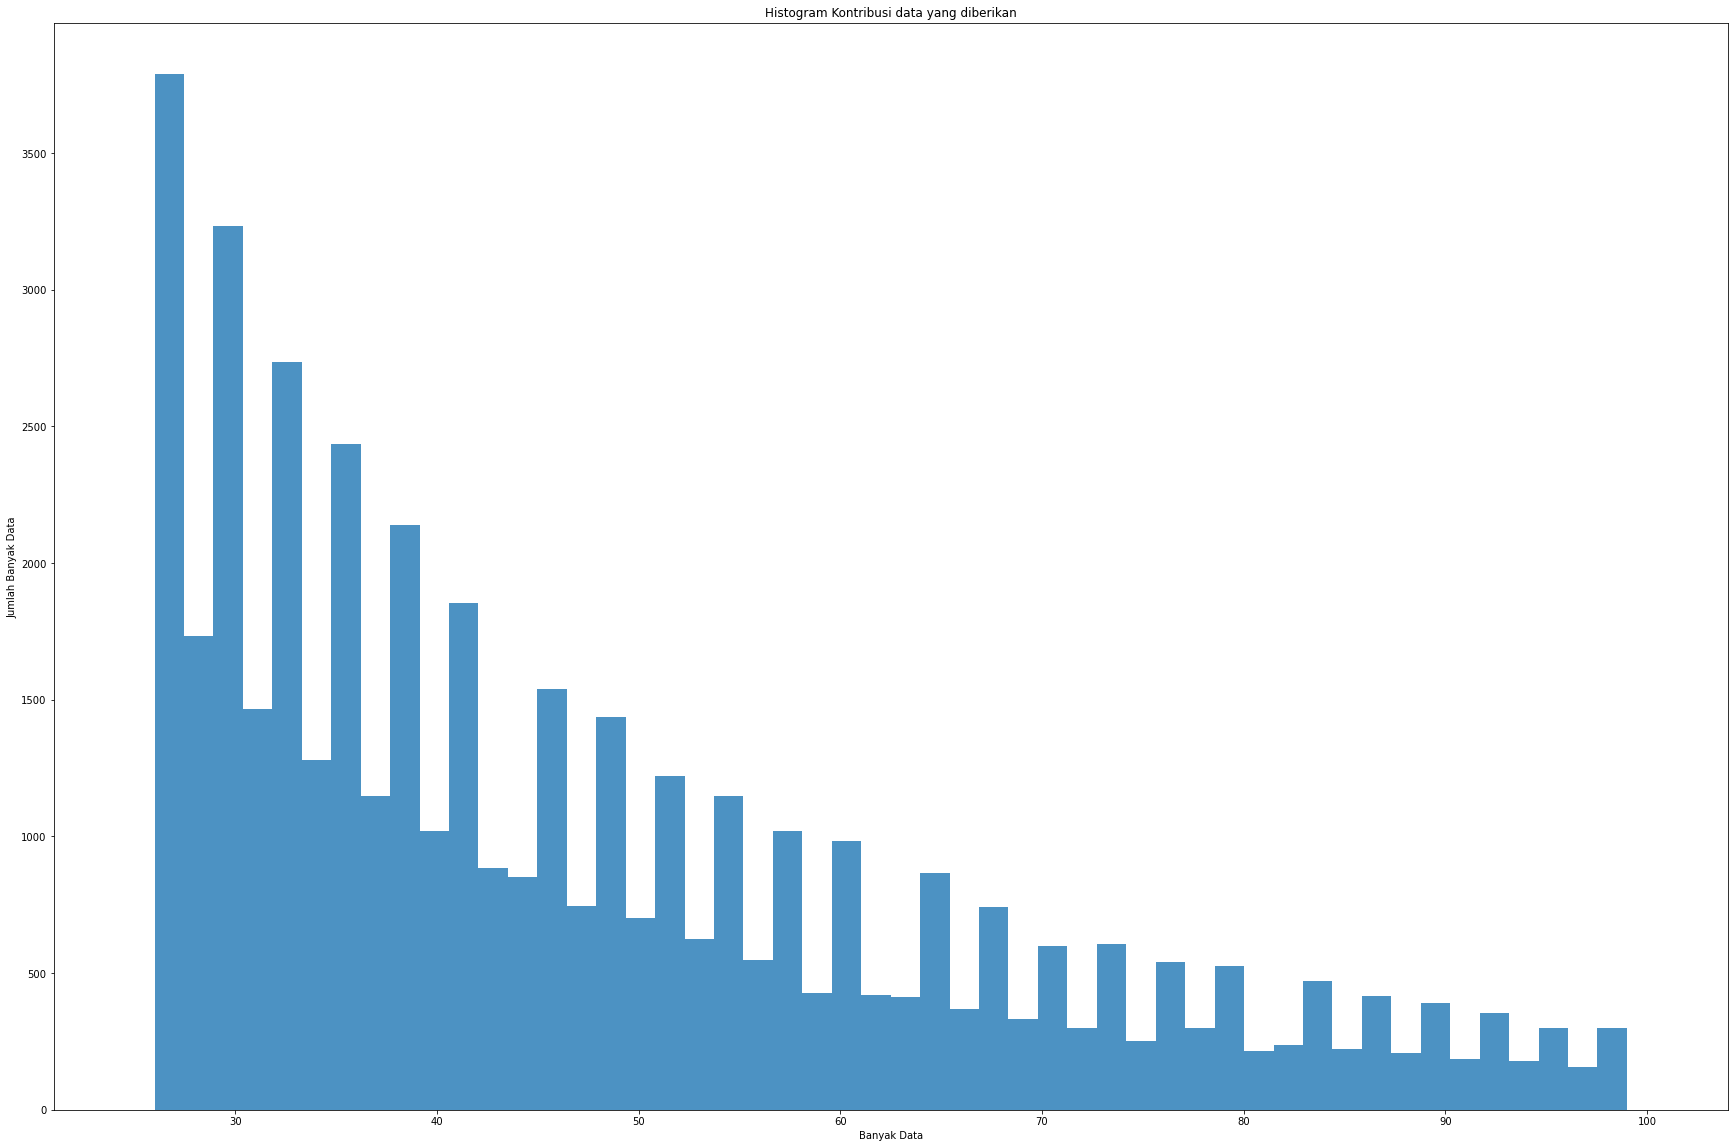

In [15]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [16]:
# Modul membantu proses statistik
import statistics

# Meannya 47.51
# Nilai mean naik dari 18,5 menjadi 47.51
print(sum(listCountUser) / len(listCountUser))

# Standar Deviasi turun dari 30.65 menjadi 18.71
# STDV yang mendekati 0 , menunjukan variasi data yang tersebat akan semakin kecil
# Dengan menurunnya nilai STDV, maka persebaran data sudah lebih balance 
# dan range jumlah record ratings per user sudah naik menjadi sekitar 30 - 60
print(statistics.stdev(listCountUser))

47.51790093182933
18.710642682079914


In [17]:
# Memang masih terdapat data yang perbedaan jumlahnya masih cukup besar, tapi lebih baik dibanding sebelumnya

In [21]:
# Dari data user yang tersisa 184, akan dicari movie apa saja yang di rate oleh mereka
df3_Filter_User = listUserDF.merge(df3,left_on='userId', right_on='userId')

In [24]:
# Dari 184 user, ternyata terdapat data sebanyak 8577
# Tapi belum tau 8577 tersebut terdapat movie yang datanya duplikasi atau tidak
df3_Filter_User.shape

(2131558, 29)

In [25]:
df3_Filter_User[df3_Filter_User['userId']==12].head(5)

,userId,counts,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,12,52,1246,5.0,943912834,24000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.rocky.com/,1246,"[{""id"": 276, ""name"": ""philadelphia""}, {""id"": 3...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It ain't over 'til it's over.,Rocky Balboa,6.5,835,1246,Rocky Balboa,"[{""cast_id"": 24, ""character"": ""Rocky Balboa"", ...","[{""credit_id"": ""52fe42e9c3a36847f802c5f9"", ""de..."
1,12,52,223,5.0,943912206,1288000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,223,"[{""id"": 660, ""name"": ""monte carlo""}, {""id"": 81...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The shadow of this woman darkened their love.,Rebecca,7.7,336,223,Rebecca,"[{""cast_id"": 10, ""character"": ""'Maxim' de Wint...","[{""credit_id"": ""56520a6d9251414af900b1b8"", ""de..."
2,12,52,2355,4.0,943912871,20000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.sonypictures.com/movies/reignoverme...,2355,"[{""id"": 2246, ""name"": ""confidence""}, {""id"": 27...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Let in the unexpected.,Reign Over Me,7.1,334,2355,Reign Over Me,"[{""cast_id"": 15, ""character"": ""Charlie Fineman...","[{""credit_id"": ""562eb58bc3a3681b5c00b9e6"", ""de..."
3,12,52,157,1.0,943910494,18000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,157,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,A dying planet. A fight for life.,Star Trek III: The Search for Spock,6.4,434,157,Star Trek III: The Search for Spock,"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
4,12,52,296,5.0,943911078,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,296,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,5.9,2143,296,Terminator 3: Rise of the Machines,"[{""cast_id"": 6, ""character"": ""The Terminator"",...","[{""credit_id"": ""52fe4234c3a36847f800bcef"", ""de..."


In [45]:
# # ubah tipe data int dari movie_id jadi str
# df3_Filter_User['movie_id'] = df3_Filter_User['movie_id'].apply(str)

In [26]:
# Lakukan Grouping ke movie, ternyata terdapat 685  Movie , 
# Artinya telah berkurang dari sebelumnya 857 movie
listMoiveDF=df3_Filter_User.groupby('movie_id').size().reset_index(name='counts')
listMoiveDF

,movie_id,counts
0,5,5620
1,11,10964
2,12,1699
3,13,836
4,14,2626
...,...,...
1299,172533,1
1300,173931,1
1301,174751,1
1302,175291,2


In [28]:
listMovie = listMoiveDF['movie_id'].values.tolist()
listCountMovie = listMoiveDF['counts'].values.tolist()

In [83]:
# Tidak dijalankan karena terlalu berat

# plt.style.use('_mpl-gallery')

# x = listMovie
# y = listCountMovie

# # plot
# fig, ax = plt.subplots(figsize=(30,15))

# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)),
#        ylim=(0, 8), yticks=np.arange(1, max(y)))

# plt.show()

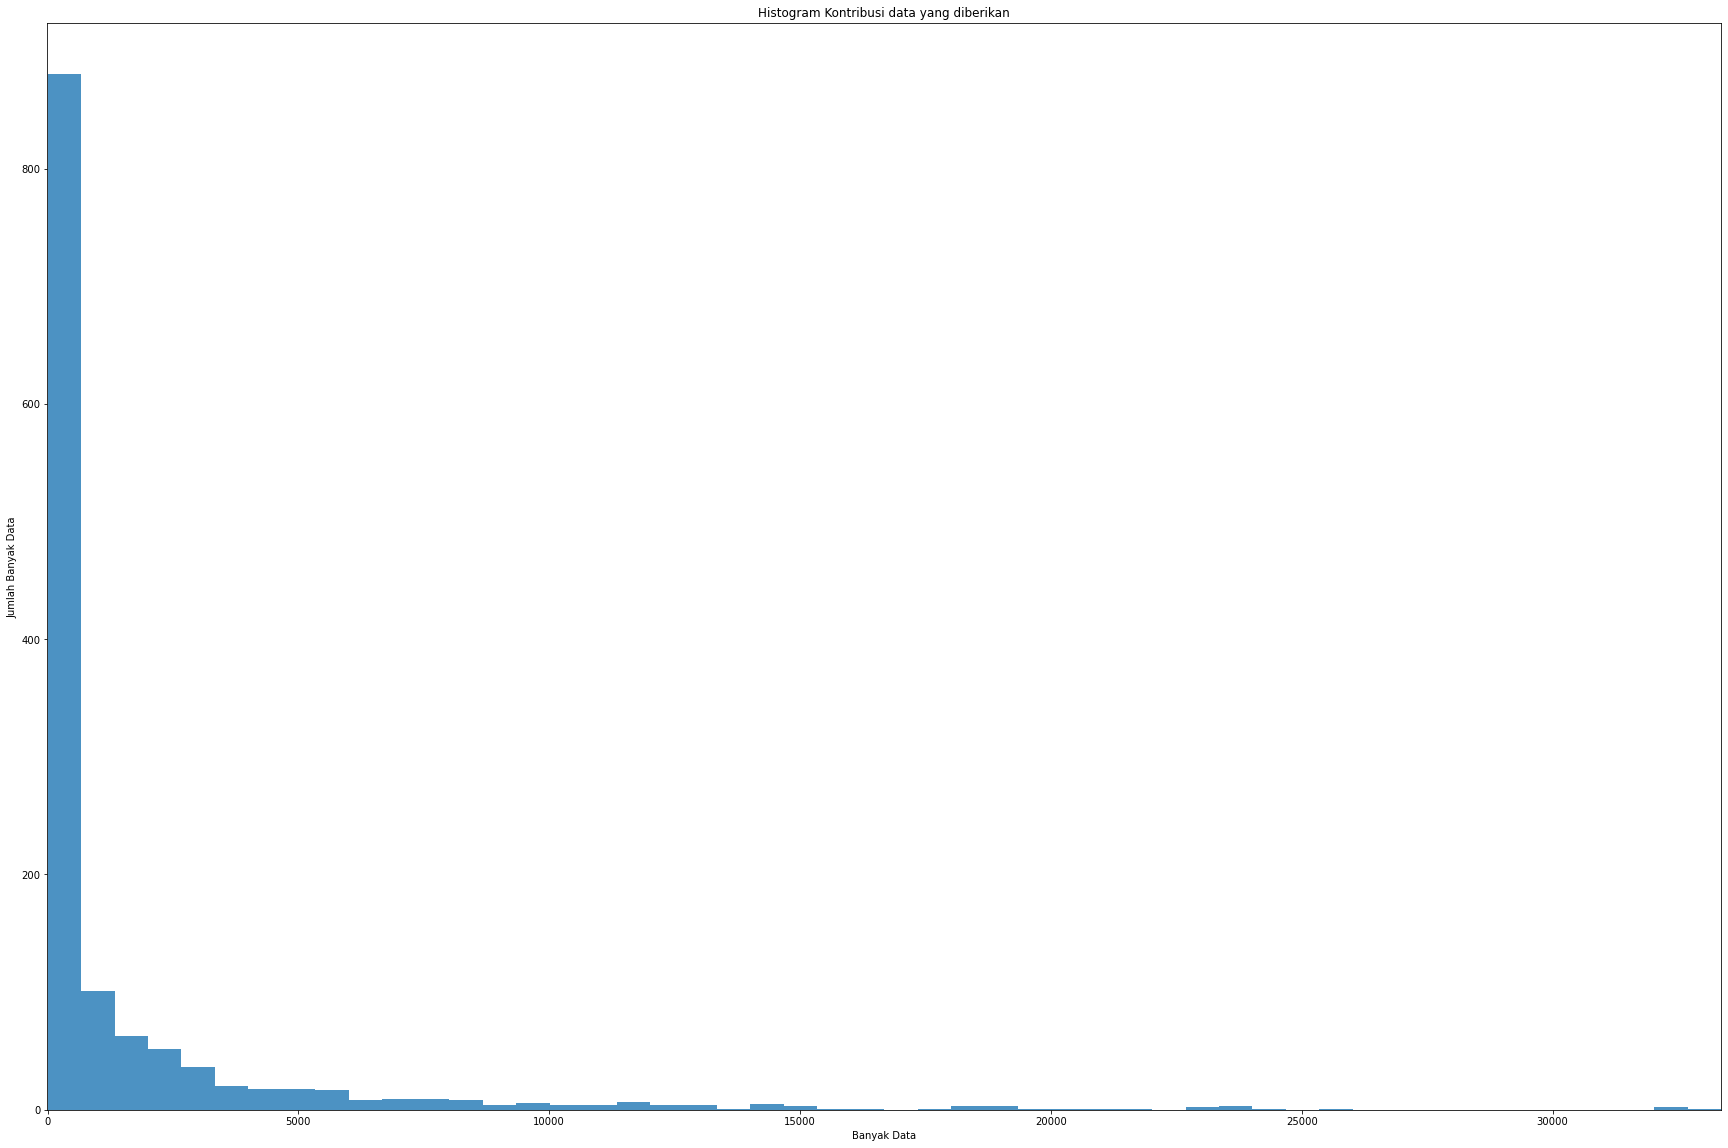

In [29]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovie

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [30]:
# Meannya 1635
print(sum(listCountMovie) / len(listCountMovie))

# Standar Deviasi nya 3788
print(statistics.stdev(listCountMovie))

# Dari grafik hystogram dipilih range nilai 750-6000 untuk dijadikan data latih
# Karena konstribusi data tersebut paling banyak dan dinilai cukup balance

1634.6303680981596
3788.783864181728


In [31]:
# Dari hystogram diatas, diketahui bahwa terdapat Movie_id 309, cukup balance jumlah data yang dimiliki
listMoiveDF_Final = listMoiveDF.loc[(listMoiveDF['counts']>750) & (listMoiveDF['counts']<6000)]
listMoiveDF_Final.shape

(309, 2)

In [32]:
listMovie = listMoiveDF_Final['movie_id'].values.tolist()
listCountMovie = listMoiveDF_Final['counts'].values.tolist()

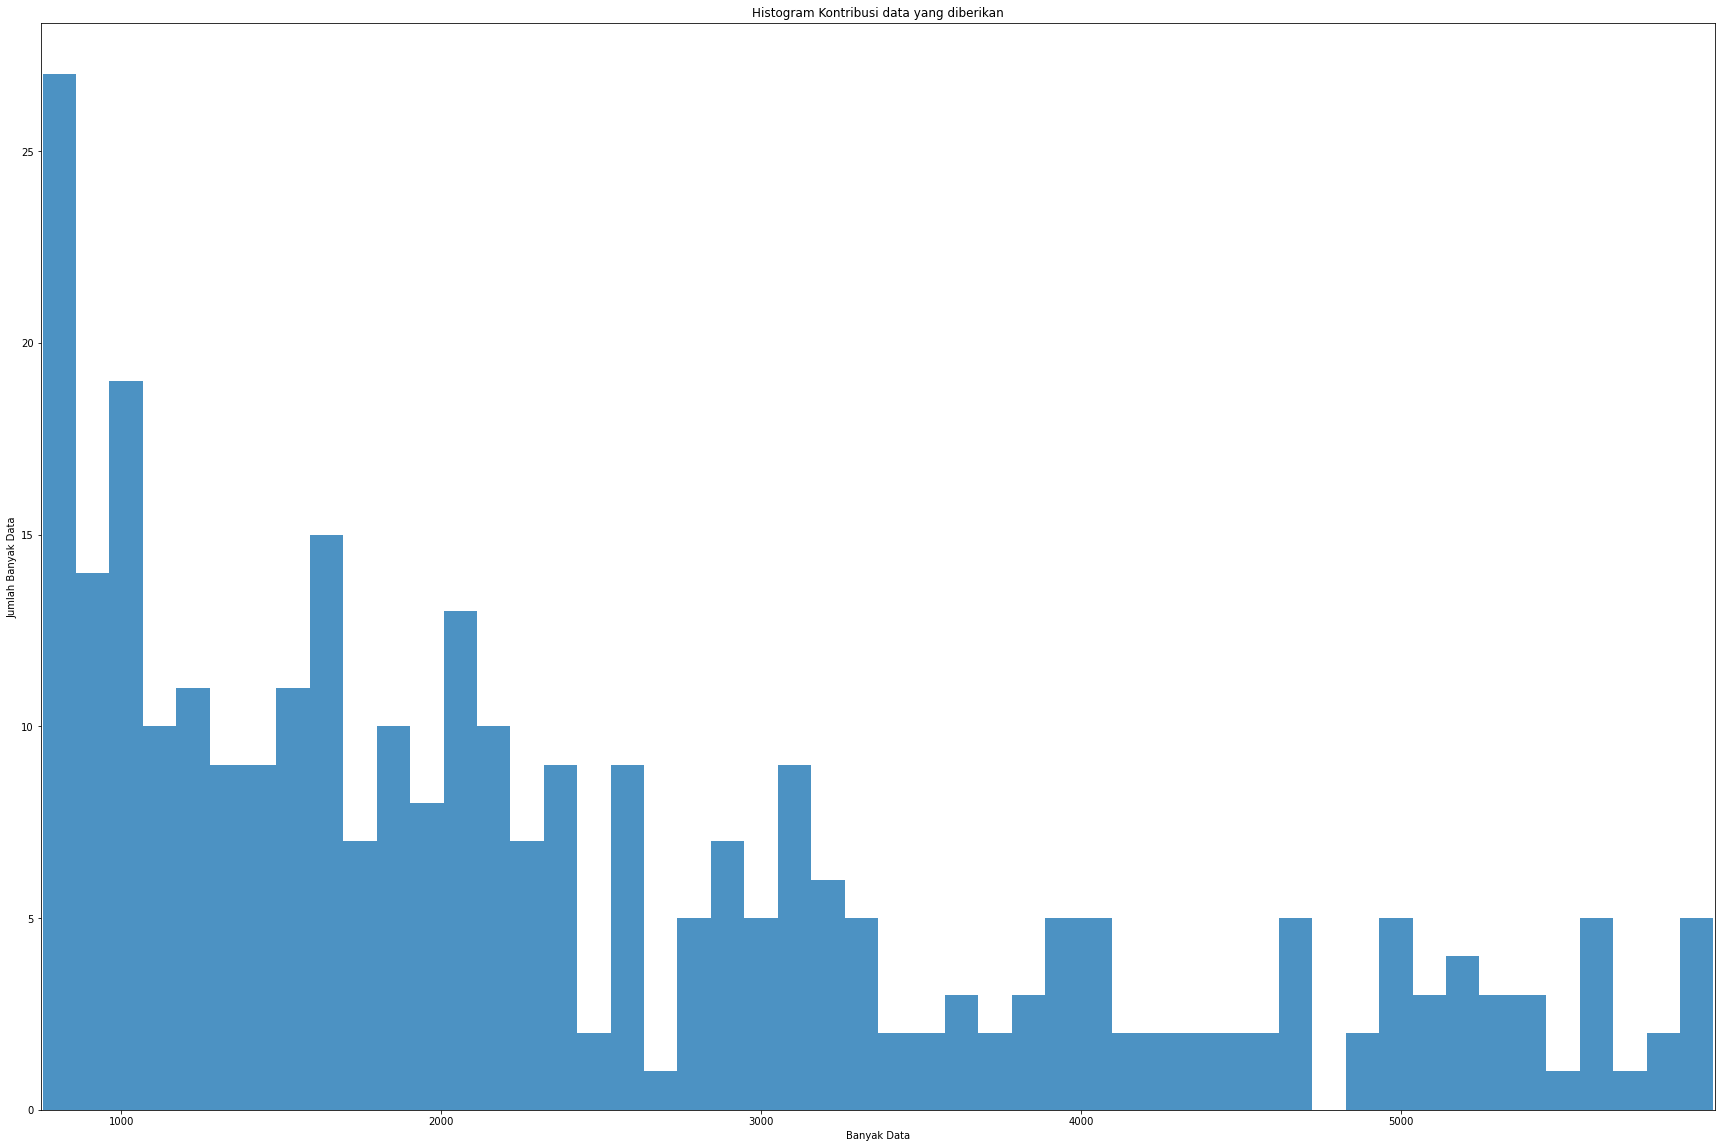

In [33]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovie

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [34]:
# Meannya 2441.517
print(sum(listCountMovie) / len(listCountMovie))

# Standar Deviasi nya turun dari 3788 menjadi 1449
print(statistics.stdev(listCountMovie))

# STDV memang sangat besar, karena datanya juga rangenya sangat besar, sehingga nilai ini sudah dinilai cukup baik

2441.517799352751
1448.9425310501624


In [81]:
# Dari 255 Movie ID yang sudah didapat, masih hanya terdapat 2 feature (movie Id, Counts)
# Maka dari itu, perlu dicari data lengkap supaya bisa Contend Based
df3_CB_Raw = df3_Filter_User.merge(listMoiveDF_Final,left_on='movie_id', right_on='movie_id')
df3_CL_Raw = df3_CB_Raw.copy()
df3_DF_Raw = df3_CB_Raw.copy()
# Setelah di merge, ternyata jadi 3333 data. Hal ini terjadi karena ada data movieId yang duplikasi
# MovieId bisa duplikasi karena ada userId yang memberikan rating lebih dari 1 kali.
df3_CB_Raw.shape

(754429, 30)

In [82]:
# Bukti ada duplikasi movie karena di rate oleh banyak user
df3_CB_Raw[df3_CB_Raw['userId']==12]

,userId,counts_x,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,counts_y
0,12,52,157,1.0,943910494,18000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,157,[],...,Released,A dying planet. A fight for life.,Star Trek III: The Search for Spock,6.4,434,157,Star Trek III: The Search for Spock,"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de...",1300
1300,12,52,1499,1.0,943910522,21000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,1499,"[{""id"": 233, ""name"": ""japan""}, {""id"": 4379, ""n...",...,Released,The Turtles Are Back....In Time.,Teenage Mutant Ninja Turtles III,5.1,184,1499,Teenage Mutant Ninja Turtles III,"[{""cast_id"": 5, ""character"": ""April O'Neil"", ""...","[{""credit_id"": ""53f989e1c3a36873580026c6"", ""de...",2761
4061,12,52,73,2.0,943910885,20000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.historyx.com/,73,"[{""id"": 279, ""name"": ""usa""}, {""id"": 376, ""name...",...,Released,Some Legacies Must End.,American History X,8.2,3016,73,American History X,"[{""cast_id"": 4, ""character"": ""Derek Vinyard"", ...","[{""credit_id"": ""5563a4c1925141271b0021e7"", ""de...",1430
5491,12,52,162,4.0,943911613,20000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",NaN,162,"[{""id"": 240, ""name"": ""underdog""}, {""id"": 699, ...",...,Released,His scars run deep.,Edward Scissorhands,7.5,3601,162,Edward Scissorhands,"[{""cast_id"": 5, ""character"": ""Edward Scissorha...","[{""credit_id"": ""52fe4220c3a36847f80061e3"", ""de...",3243
8734,12,52,176,4.0,943912719,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",...,Released,Live or die. Make your choice.,Saw,7.2,2184,176,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",1232
9966,12,52,194,5.0,943912278,10000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.die-fabelhafte-welt-der-amelie.de,194,"[{""id"": 90, ""name"": ""paris""}, {""id"": 128, ""nam...",...,Released,One person can change your life forever.,Amélie,7.8,3310,194,Amélie,"[{""cast_id"": 4, ""character"": ""Am\u00e9lie Poul...","[{""credit_id"": ""52fe4225c3a36847f800778b"", ""de...",3454
13420,12,52,322,5.0,943912871,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,322,"[{""id"": 516, ""name"": ""child abuse""}, {""id"": 73...",...,Released,"We bury our sins, we wash them clean.",Mystic River,7.6,1422,322,Mystic River,"[{""cast_id"": 4, ""character"": ""Jimmy Markum"", ""...","[{""credit_id"": ""52fe4237c3a36847f800d051"", ""de...",1615
15035,12,52,334,3.0,943911435,37000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.magnoliamovie.com/,334,"[{""id"": 455, ""name"": ""farewell""}, {""id"": 802, ...",...,Released,Things fall down. People look up. And when it ...,Magnolia,7.5,825,334,Magnolia,"[{""cast_id"": 3, ""character"": ""Linda Partridge""...","[{""credit_id"": ""52fe4239c3a36847f800d6cb"", ""de...",894
15929,12,52,348,4.0,943912353,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 28, ""nam...",https://www.facebook.com/alienanthology/,348,"[{""id"": 803, ""name"": ""android""}, {""id"": 1825, ...",...,Released,In space no one can hear you scream.,Alien,7.9,4470,348,Alien,"[{""cast_id"": 3, ""character"": ""Arthur Dallas"", ...","[{""credit_id"": ""52fe423bc3a36847f800e117"", ""de...",4855
20784,12,52,492,4.0,943910623,13000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",NaN,492,"[{""id"": 30, ""name"": ""individual""}, {""id"": 108,...",...,Released,Ever wanted to be someone else? Now you can.,Being John Malkovich,7.3,1101,492,Being John Malkovich,"[{""cast_id"": 5, ""character"": ""Craig Schwartz"",...","[{""credit_id"": ""52fe4249c3a36847f80128f7"", ""de...",15

In [83]:
# Persiapkan Data Content Based
# Hapus duplikasi
df3_CB_P = df3_CB_Raw.copy()
df3_CB_P = df3_CB_P[['movieId','title_y','overview','genres','keywords','cast','crew']]
df3_CB_P

,movieId,title_y,overview,genres,keywords,cast,crew
0,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
1,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
2,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
3,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
4,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
...,...,...,...,...,...,...,...
754424,5900,The Dress,The story of a summer dress and those who have...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 6397, ""name"": ""calamity""}]","[{""cast_id"": 2, ""character"": ""Van Tilt"", ""cred...","[{""credit_id"": ""52fe442bc3a36847f80864f3"", ""de..."
754425,5900,The Dress,The story of a summer dress and those who have...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 6397, ""name"": ""calamity""}]","[{""cast_id"": 2, ""character"": ""Van Tilt"", ""cred...","[{""credit_id"": ""52fe442bc3a36847f80864f3"", ""de..."
754426,5900,The Dress,The story of a summer dress and those who have...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 6397, ""name"": ""calamity""}]","[{""cast_id"": 2, ""character"": ""Van Tilt"", ""cred...","[{""credit_id"": ""52fe442bc3a36847f80864f3"", ""de..."
754427,5900,The Dress,The story of a summer dress and those who have...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 6397, ""name"": ""calamity""}]","[{""cast_id"": 2, ""character"": ""Van Tilt"", ""cred...","[{""credit_id"": ""52fe442bc3a36847f80864f3"", ""de..."


In [85]:
df3_CB_P=df3_CB_P.drop_duplicates()
df3_CB_P.shape

(309, 7)

In [86]:
df3_CB_P.head(4)

,movieId,title_y,overview,genres,keywords,cast,crew
0,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
1300,1499,Teenage Mutant Ninja Turtles III,The four turtles travel back in time to the da...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 233, ""name"": ""japan""}, {""id"": 4379, ""n...","[{""cast_id"": 5, ""character"": ""April O'Neil"", ""...","[{""credit_id"": ""53f989e1c3a36873580026c6"", ""de..."
4061,73,American History X,Derek Vineyard is paroled after serving 3 year...,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 279, ""name"": ""usa""}, {""id"": 376, ""name...","[{""cast_id"": 4, ""character"": ""Derek Vinyard"", ...","[{""credit_id"": ""5563a4c1925141271b0021e7"", ""de..."
5491,162,Edward Scissorhands,A small suburban town receives a visit from a ...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 240, ""name"": ""underdog""}, {""id"": 699, ...","[{""cast_id"": 5, ""character"": ""Edward Scissorha...","[{""credit_id"": ""52fe4220c3a36847f80061e3"", ""de..."


In [89]:
# Persiapkan data Collaborative Filtering
df3_CL_P = df3_DF_Raw.copy()
df3_CL_P = df3_CL_Raw[['userId','movieId','rating']]
df3_CL_P.shape

(754429, 3)

In [97]:
# Persiapkan data Demografik Filtering
df3_DF_P = df3_DF_Raw[['title_y','vote_count','vote_average']].drop_duplicates()
df3_DF_P.shape

(309, 3)

In [123]:
# Preprosesing data, dimana movie yang terlalu sedikit data vote, akan dibuang
# Movie yang votenya dibawah 703 akan dibuang
m= df3_DF_P['vote_count'].quantile(0.5)
print(m)
q_movies = df3_DF_P.copy().loc[df3_DF_P['vote_count'] >= m]
q_movies.shape

703.0


(155, 3)

In [124]:
# Kita cari rata" karena dibutuhkan dirumus IMDB nya
C= df3_DF_P['vote_average'].mean()
C

6.665372168284791

In [125]:
# Rumus dari IMDB
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [126]:
# Tambahkan Kolom Score yang nilainya didapat dari rumusnya
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [130]:
# Dari Score yang didapat, di sorting
q_movies = q_movies.sort_values('score', ascending=False)

# tampilkan top 10
q_movies[['title_y', 'vote_count', 'vote_average', 'score']].head(10)

,title_y,vote_count,vote_average,score
586653,Fight Club,9413,8.3,8.186403
415145,Forrest Gump,7927,8.2,8.074989
540690,The Lord of the Rings: The Return of the King,8064,8.1,7.984961
4061,American History X,3016,8.2,7.909910
752203,The Shining,3757,8.1,7.873869
618609,Back to the Future,6079,8.0,7.861657
727047,The Prestige,4391,8.0,7.815814
561951,Dead Poets Society,2705,8.1,7.804066
49208,Return of the Jedi,4665,7.9,7.738312
15929,Alien,4470,7.9,7.732217


In [131]:
# # Kalau mau export data_CF.csv
# df3_CB_P.to_csv('data_CF.csv')

In [132]:
# Persiapan data Collaborative Filtering untuk training
data = Dataset.load_from_df(df3_CL_P[['userId', 'movieId', 'rating']], reader)

In [133]:
# Gunakan SVD untuk Collaborative Filtering
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'],cv=7)


{'test_rmse': array([0.89815064, 0.89279779, 0.89818732, 0.89927977, 0.89455176,
        0.89509268, 0.89235487]),
 'test_mae': array([0.69604255, 0.69267312, 0.69417506, 0.69766331, 0.69232219,
        0.69297324, 0.69079228]),
 'fit_time': (24.715845108032227,
  24.800421714782715,
  25.05396008491516,
  24.9260356426239,
  25.382960557937622,
  25.154959201812744,
  24.7448787689209),
 'test_time': (0.6470026969909668,
  0.6329991817474365,
  0.6439988613128662,
  0.811997652053833,
  0.8669977188110352,
  0.8119983673095703,
  0.6405525207519531)}

In [51]:
trainset = data.build_full_trainset()
svd=svd.fit(trainset)

In [52]:
# Target sasaran
df3_CL_P[df3_CL_P['userId']==62]

,userId,movieId,rating
65673,62,1262,4.0
76064,62,107,4.0
90016,62,1831,1.5
146042,62,3082,3.5
161958,62,1947,3.5
170821,62,277,2.5
175874,62,455,2.0
180753,62,673,2.5
186067,62,783,2.0
200132,62,2085,2.0


In [53]:
# Acuan User
df3_CL_P[df3_CL_P['userId']==67]

,userId,movieId,rating


In [54]:
# Acuan item, rata" ratings suatu item
ListMovieId = df3_CL_P[df3_CL_P['movieId']==2018]['rating'].values.tolist()
sum(ListMovieId)/len(ListMovieId)

3.516133162612036

In [55]:
# Dari model yang sudah terbentuk maka dapat ditestkan
svd.predict(67, 8996) 

Prediction(uid=67, iid=8996, r_ui=None, est=3.4180532561712234, details={'was_impossible': False})

In [57]:
# Content Based nya
# Pakai TF-IDF Vectorizer Object. Buang semua stopword 'the', 'a' karena kurang terkait konteks
tfidf = TfidfVectorizer(stop_words='english')

# sebelum pembobotan, pastikan overview NaN diubah jadi '', karena akan error kalau NaN dibiarin
df3_CB_P['overview'] = df3_CB_P['overview'].fillna('')

# TF-IDF kan overview yang sudah dibetulkan overviewnya
tfidf_matrix = tfidf.fit_transform(df3_CB_P['overview'])

# shape of tfidf_matrix (Jumlah data dan jumlah Feature)
tfidf_matrix.shape


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(309, 4256)

In [58]:
# Idenya adalah membandingkan nilai diantara tfidf.

# Import linear_kernel dari sklearn
from sklearn.metrics.pairwise import linear_kernel

# Hasil nilai cosine similarity matrix (kesamaan diantara hasil tfidf nya)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [142]:
len(cosine_sim)

309

In [59]:
df3_CB_P

,movieId,title_y,overview,genres,keywords,cast,crew
0,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
1300,1499,Teenage Mutant Ninja Turtles III,The four turtles travel back in time to the da...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 233, ""name"": ""japan""}, {""id"": 4379, ""n...","[{""cast_id"": 5, ""character"": ""April O'Neil"", ""...","[{""credit_id"": ""53f989e1c3a36873580026c6"", ""de..."
4061,73,American History X,Derek Vineyard is paroled after serving 3 year...,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 279, ""name"": ""usa""}, {""id"": 376, ""name...","[{""cast_id"": 4, ""character"": ""Derek Vinyard"", ...","[{""credit_id"": ""5563a4c1925141271b0021e7"", ""de..."
5491,162,Edward Scissorhands,A small suburban town receives a visit from a ...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 240, ""name"": ""underdog""}, {""id"": 699, ...","[{""cast_id"": 5, ""character"": ""Edward Scissorha...","[{""credit_id"": ""52fe4220c3a36847f80061e3"", ""de..."
8734,176,Saw,Obsessed with teaching his victims the value o...,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...","[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de..."
...,...,...,...,...,...,...,...
749364,6615,Lars and the Real Girl,Sometimes you find love where you'd least expe...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 2101, ""name"": ""garage""}, {""id"": 3568, ...","[{""cast_id"": 13, ""character"": ""Lars Lindstrom""...","[{""credit_id"": ""52fe445ec3a36847f8091deb"", ""de..."
750149,35,The Simpsons Movie,After Homer accidentally pollutes the town's w...,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...","[{""id"": 494, ""name"": ""father son relationship""...","[{""cast_id"": 2, ""character"": ""Homer / Itchy / ...","[{""credit_id"": ""52fe4211c3a36847f8001521"", ""de..."
750977,544,There's Something About Mary,Having never fully recovered from a prom date ...,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...","[{""id"": 3262, ""name"": ""surgeon""}, {""id"": 6844,...","[{""cast_id"": 5, ""character"": ""Mary Jensen"", ""c...","[{""credit_id"": ""52fe424fc3a36847f8014609"", ""de..."
752203,694,The Shining,Jack Torrance accepts a caretaker job at the O...,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...","[{""id"": 612, ""name"": ""hotel""}, {""id"": 1533, ""n...","[{""cast_id"": 18, ""character"": ""Jack Torrance"",...","[{""credit_id"": ""52fe426bc3a36847f801d3a1"", ""de..."


In [60]:
# Inputan akan pakai judul
df3_CB_P.reset_index(inplace = True)
indices = pd.Series(df3_CB_P.index, index=df3_CB_P['title_y'])

In [69]:
# Fungsi untuk menjadikan judul sebagai inputan dan mengeluarkan output film yang mirip
def get_recommendations(title, cosine_sim=cosine_sim):

    # Dari Index yang dibuat sebelumnya, dipakai untuk mencari baris data film dengan memakai judul 
    # idx akan mendapatkan lokasi index cosine_sim dari film yang dicari
    idx = indices[title]
    
    # Cari nilai cosine_sim dengan film" lain
    sim_scores = list(enumerate(cosine_sim[idx]))

    # urutkan berdasarkan nilai cosine_sim
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # ambil 10 teratas
    sim_scores = sim_scores[1:11]

    # pada nilai sim_score terdapat 2 kolom : id dan score
    # Ambil ID nya untuk dipakai mencari nama judul nya dibaris selanjutnya
    movie_indices = [i[0] for i in sim_scores]
    
    # Dari daftar ID yang sudah didapat, gunakan "iloc" untuk mencari baris data dari ID
    # Ambil  title dan id nya untuk dikembalikan
    return df3_CB_P[['title_y','index']].iloc[movie_indices]

#     # Jika ingin melihat score 
#     return sim_scores

In [70]:
df3_CB_P.shape

(309, 8)

In [71]:
df3_CB_P[df3_CB_P['title_y']=='War of the Worlds']

,index,movieId,title_y,overview,genres,keywords,cast,crew
210,602162,74,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...","[{""id"": 447, ""name"": ""post traumatic stress d...","[{""cast_id"": 13, ""character"": ""Ray Ferrier"", ""...","[{""credit_id"": ""52fe4213c3a36847f8002237"", ""de..."


In [72]:
get_recommendations('Krull')

,title_y,index
8,Alien,15929
273,Escape from the Planet of the Apes,708796
176,The Thing,537088
244,Mission to Mars,667331
68,Cold Mountain,216886
135,Predator 2,415981
121,Kill Bill: Vol. 1,374544
178,The Lord of the Rings: The Return of the King,540690
116,Kill Bill: Vol. 2,356347
292,Star Trek: First Contact,734266


In [135]:
# hybrid Filtering akan menjalankan Content Based dahulu, baru kemudian di sorting menggunakan Collaborative 
def hybridFiltering(userId,title):
    dataFilm_CB = get_recommendations(title)
    
    listSVD_predict=[]
    
    dataFilm_CB_List = dataFilm_CB['index'].values.tolist()
    for movieId in dataFilm_CB_List:
        listSVD_predict.append([svd.predict(userId, movieId).est,movieId,dataFilm_CB[dataFilm_CB['index']==movieId].title_y.values.tolist()])
        
    return sorted(listSVD_predict,key=lambda x: (x[0],x[1]),reverse=True)

In [136]:
# Terlihat sudah ter sorting kembali
arrayResult =np.array(hybridFiltering(176,'Krull'))[:,2]
for i in arrayResult:
    print(i[0])

KeyError: "['index'] not in index"

In [137]:
# Acuan User
test = df3_CL_P[df3_CL_P['userId']==176]

testMovie = df3_CB_P.merge(test,left_on='movieId', right_on='movieId')
testMovie[['title_y','rating']]

,title_y,rating
0,"Monsters, Inc.",4.0
1,Underworld,3.0
2,Terminator Salvation,5.0
3,The Last Samurai,4.0
4,Harry Potter and the Philosopher's Stone,4.0
5,Forrest Gump,3.0
6,Saw IV,5.0
7,The Lord of the Rings: The Return of the King,2.0
8,Casablanca,3.0
9,Batman & Robin,3.0


In [ ]:
# Terlihat proses rekomendasi sudah terjadi, The Things yang sebelumnya no 3, naik jadi no 1 karena user suka SawIV yang 
# notabene adalah film sadis. Rekomendasi Cold Mountain yang sebelumnya no 5, turun menjadi no 9 karena user tidak suka drama
# terlihat dari penilaian ke film casablanca dan Forrest Gump

# Sebetulnya masih ada beberapa faktor lain yang dipertanyakan. 
# (1) Kenapa Terminator Salvatin suka, tapi The Terminator tidak suka

# Permasalahan tersebut bisa dijawab, jika Content Based tidak hanya menggunakan Overview saja, tetapi genre,cast,crew dll

In [ ]:
# Demografik Filtering tidak digunakan, karena datanya hanya terdapat 155 movie. Sedangkan data pada Content Based
# Terdapat 309. Jika Demografik Filtering dikombinasikan dengan Content Based dan Collaborative Filtering. Maka dapat
# menyebabkan model terjebak pada area 155 movie saja. Padahal bisa jadi 154 sisanya memiliki tema" tertentu yang tidak 
# terdapat di 155 movie yang dimiliki. Hal tersebut berbahaya ini berbahaya
